## 作業
### 請使用 application_train.csv, 根據不同的 HOUSETYPE_MODE 對 AMT_CREDIT 繪製 Histogram

# [作業目標]
- 試著調整資料, 並利用提供的程式繪製分布圖

# [作業重點]
- 如何將列出相異的 HOUSETYPE_MODE 類別 (In[3])
- 如何依照不同的 HOUSETYPE_MODE 類別指定資料, 並繪製長條圖(.hist())? (In[3])

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 另一個繪圖-樣式套件

# 忽略警告訊息
%matplotlib inline
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取檔案
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Test by YH - 為了寫出作業進行的測試
# Double confirm ".unique" 的回傳值
unique_house_type = app_train['HOUSETYPE_MODE'].unique()
unique_house_type

array(['block of flats', nan, 'terraced house', 'specific housing'],
      dtype=object)

In [4]:
print(np.isnan(unique_house_type[1]))
print(str(unique_house_type[1])=='nan')
# print(app_train['HOUSETYPE_MODE'].apply(lambda x: type(x)))

True
True


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000270B6F6C18>]],
      dtype=object)

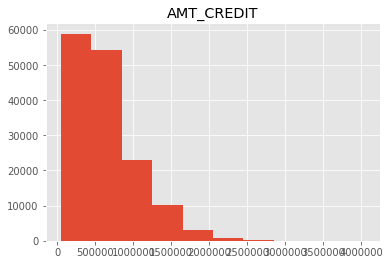

In [5]:
# Test by YH - 為了寫出作業進行的測試
# 繪製一張圖看看
# DataFrame.hist 會呼叫 plt.hist -> 這樣的寫法其實不好
app_train.loc[app_train['HOUSETYPE_MODE']==unique_house_type[0],['AMT_CREDIT']].hist()

In [6]:
# Test by YH - 為了寫出作業進行的測試
# Floor devision
print(5 // 2)
print((5//2)+(5%2))

2
3


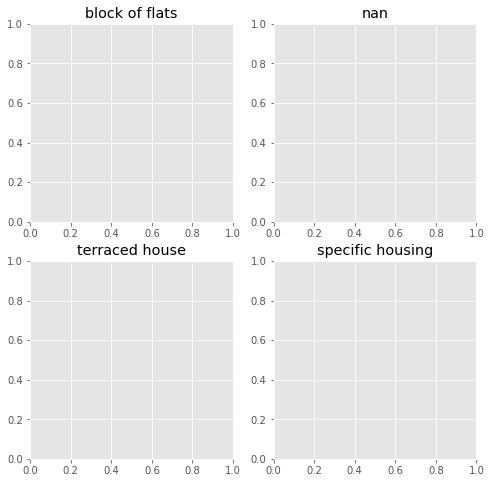

In [25]:
# Test by YH - 為了寫出作業進行的測試
plt.figure(figsize=(8,8))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
    # 這邊的語法都沒有問題，有準確的產生 subplot
    # 但是如果加上下面這行會出問題
    # app_train.loc[app_train['HOUSETYPE_MODE']==unique_house_type[i],['AMT_CREDIT']].hist()
    # 所以一定是這行的問題    
    plt.title(str(unique_house_type[i]))   
plt.show()

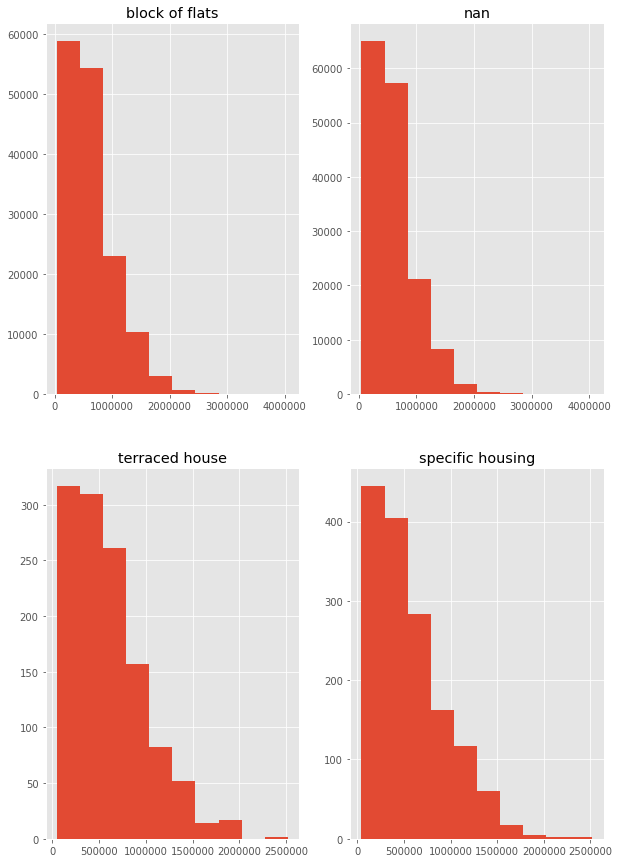

In [22]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版

unique_house_type = app_train['HOUSETYPE_MODE'].unique()

nrows = 2
ncols = len(unique_house_type)//2 + len(unique_house_type)%2

# subplot(nrows, ncols, i+1) 總共也就4張圖
# nrows = len(unique_house_type)，ncols = nrows//2
# 這樣的寫法根本不會有第二個 column
# 稍微修改一下題目，題目不知道在幹嘛...
# 題目看起來想將圖形排成 2個 row，但是做 floor devision不合理
# "nrows // 2" -> "nrows//2 + nrows%2   "
# print(nrows,ncols)
# print(range(len(unique_house_type)))

plt.figure(figsize=(10,15))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)

    if str(unique_house_type[i])=='nan':
        # app_train.loc[app_train['HOUSETYPE_MODE'].apply(lambda x: type(x))!= type('str'),['AMT_CREDIT']].hist()
        # -> 上面這個句法沒有直接使用 plt/sns 底下的方法，無法跟 subplot整合在一起
        plt.hist(np.array(app_train.loc[app_train['HOUSETYPE_MODE'].apply(lambda x: type(x))!= type('str'),['AMT_CREDIT']]))
        # 'str'本身就是一個字串，type('str')回傳'str'的類別，就會是字串類別
    else:
        # app_train.loc[app_train['HOUSETYPE_MODE']==unique_house_type[i],['AMT_CREDIT']].hist()
        # -> 上面這個句法沒有直接使用 plt/sns 底下的方法，無法跟 subplot整合在一起
        plt.hist(np.array(app_train.loc[app_train['HOUSETYPE_MODE']==unique_house_type[i],['AMT_CREDIT']]))    
    
    plt.title(str(unique_house_type[i]))   
plt.show()

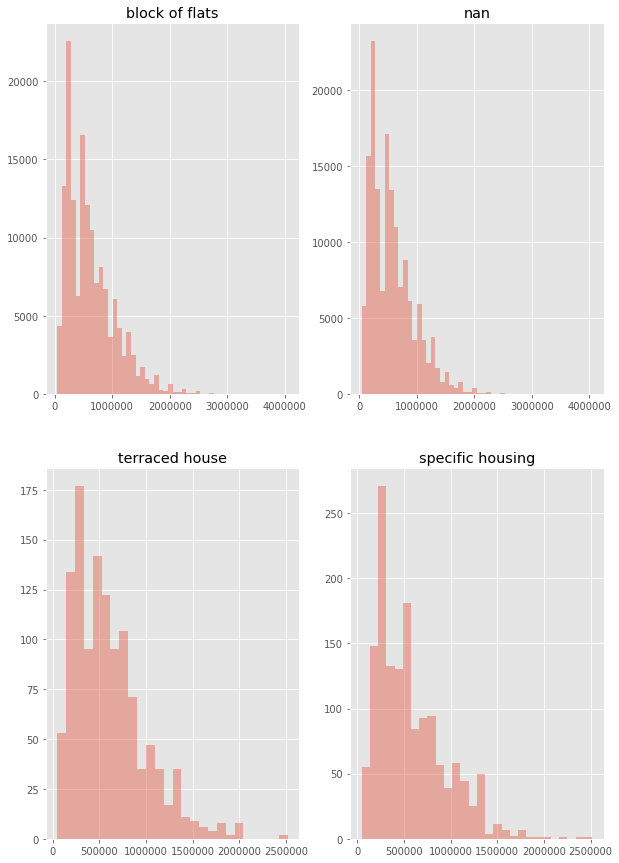

In [8]:
# 使用不同的 HOUSETYPE_MODE 類別繪製圖形, 並使用 subplot 排版

# 使用 sns.distplot 好像和 plt.subplot(nrows, ncols, i+1) 比較相容，這樣的與法比較不會出問題
# 原因可能是因為 app_train.loc[app_train['HOUSETYPE_MODE']==unique_house_type[i],['AMT_CREDIT']].hist()
# 是另外呼叫 function 對它作圖，似乎沒有辦法跟 subplot 整在一起

unique_house_type = app_train['HOUSETYPE_MODE'].unique()

nrows = 2
ncols = len(unique_house_type)//2 + len(unique_house_type)%2

plt.figure(figsize=(10,15))
for i in range(len(unique_house_type)):
    plt.subplot(nrows, ncols, i+1)
        
    if str(unique_house_type[i])=='nan':
        sns.distplot(app_train.loc[app_train['HOUSETYPE_MODE'].apply(lambda x: type(x))!= type('str'),['AMT_CREDIT']],kde=False)
        # 'str'本身就是一個字串，type('str')回傳'str'的類別，就會是字串類別
    else:
        sns.distplot(app_train.loc[app_train['HOUSETYPE_MODE']==unique_house_type[i],['AMT_CREDIT']],kde=False)
    plt.title(str(unique_house_type[i]))    
plt.show()